In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv("/Users/priyanshu.tuli/Desktop/machinehack/sticker_sale_forecast/playground-series-s5e1/train.csv")

In [3]:
test_df = pd.read_csv("/Users/priyanshu.tuli/Desktop/machinehack/sticker_sale_forecast/playground-series-s5e1/test.csv")

In [4]:
train_df.shape, test_df.shape

((230130, 6), (98550, 5))

In [5]:
train_df.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [6]:
test_df.head()

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [8]:
train_df['id'].nunique()

230130

In [9]:
train_df.drop(columns=['id'], inplace=True)

In [10]:
set(train_df.columns) - set(test_df.columns)

{'num_sold'}

In [11]:
train_df.dropna(subset=['num_sold'], inplace=True)

In [12]:
train_df.shape

(221259, 5)

In [13]:
train_df.head()

,date,country,store,product,num_sold
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0


In [14]:
train_df['product'].value_counts(normalize=True)

product
Kaggle                0.208019
Kaggle Tiers          0.208019
Kerneler Dark Mode    0.208014
Kerneler              0.207729
Holographic Goose     0.168219
Name: proportion, dtype: float64

In [15]:
train_df['country'].value_counts(normalize=True)

country
Finland      0.173349
Italy        0.173349
Norway       0.173349
Singapore    0.173349
Canada       0.154159
Kenya        0.152446
Name: proportion, dtype: float64

In [16]:
train_df['store'].value_counts(normalize=True)

store
Premium Sticker Mart    0.342061
Stickers for Less       0.334649
Discount Stickers       0.323291
Name: proportion, dtype: float64

In [17]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

In [18]:
train_df['is_weekend'] = train_df['date'].dt.dayofweek.isin([5, 6])
test_df['is_weekend'] = test_df['date'].dt.dayofweek.isin([5, 6])

In [19]:
train_df['day_of_week'] = train_df['date'].dt.dayofweek
test_df['day_of_week'] = test_df['date'].dt.dayofweek

In [20]:
train_df['month'] = train_df['date'].dt.month
test_df['month'] = test_df['date'].dt.month

In [21]:
train_df['week_number'] = train_df['date'].dt.isocalendar().week
test_df['week_number'] = test_df['date'].dt.isocalendar().week

In [22]:
train_df['is_month_end'] = train_df['date'].dt.is_month_end
test_df['is_month_end'] = test_df['date'].dt.is_month_end
train_df['is_month_start'] = train_df['date'].dt.is_month_start
test_df['is_month_start'] = test_df['date'].dt.is_month_start
train_df['is_quarter_end'] = train_df['date'].dt.is_quarter_end
test_df['is_quarter_end'] = test_df['date'].dt.is_quarter_end

In [23]:
train_df['is_week_start'] = train_df['date'].dt.dayofweek == 0
test_df['is_week_start'] = test_df['date'].dt.dayofweek == 0

In [24]:
train_df['year'] = train_df['date'].dt.year
test_df['year'] = test_df['date'].dt.year

In [25]:
train_df['is_leap_year'] = train_df['date'].dt.is_leap_year
test_df['is_leap_year'] = test_df['date'].dt.is_leap_year

In [26]:
train_country_dummies = pd.get_dummies(train_df['country'], prefix='country')
test_country_dummies = pd.get_dummies(test_df['country'], prefix='country')

In [27]:
set(train_country_dummies.columns) - set(test_country_dummies.columns)

set()

In [28]:
set(test_country_dummies.columns) - set(train_country_dummies.columns)

set()

In [29]:
train_df = pd.concat([train_df, train_country_dummies], axis=1)
test_df = pd.concat([test_df, test_country_dummies], axis=1)

In [30]:
train_df.head()

,date,country,store,product,num_sold,is_weekend,day_of_week,month,week_number,is_month_end,...,is_quarter_end,is_week_start,year,is_leap_year,country_Canada,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,False,4,1,53,False,...,False,False,2010,False,True,False,False,False,False,False
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,False,4,1,53,False,...,False,False,2010,False,True,False,False,False,False,False
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,False,4,1,53,False,...,False,False,2010,False,True,False,False,False,False,False
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,False,4,1,53,False,...,False,False,2010,False,True,False,False,False,False,False
5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,False,4,1,53,False,...,False,False,2010,False,True,False,False,False,False,False


In [31]:
train_store_dummies = pd.get_dummies(train_df['store'], prefix='store')
test_store_dummies = pd.get_dummies(test_df['store'], prefix='store')

In [32]:
set(train_store_dummies.columns) - set(test_store_dummies.columns)

set()

In [33]:
set(train_store_dummies.columns) - set(test_store_dummies.columns)

set()

In [34]:
train_df = pd.concat([train_df, train_store_dummies], axis=1)
test_df = pd.concat([test_df, test_store_dummies], axis=1)

In [35]:
train_product_dummies = pd.get_dummies(train_df['product'], prefix='product')
test_product_dummies = pd.get_dummies(test_df['product'], prefix='product')

In [36]:
set(train_product_dummies.columns) - set(test_product_dummies.columns)

set()

In [37]:
set(test_product_dummies.columns) - set(train_product_dummies.columns)

set()

In [38]:
train_df = pd.concat([train_df, train_product_dummies], axis=1)
test_df = pd.concat([test_df, test_product_dummies], axis=1)

In [39]:
train_df['mean_num_sold_by_product'] = train_df.groupby('product')['num_sold'].transform('mean')
train_df['median_num_sold_by_product'] = train_df.groupby('product')['num_sold'].transform('median')
train_df['std_num_sold_by_product'] = train_df.groupby('product')['num_sold'].transform('std')
train_df['max_num_sold_by_product'] = train_df.groupby('product')['num_sold'].transform('max')
train_df['min_num_sold_by_product'] = train_df.groupby('product')['num_sold'].transform('min')

In [40]:
for i, group in test_df.groupby("product"):
    test_df.loc[group.index, 'mean_num_sold_by_product'] = train_df.loc[train_df['product'] == i, 'num_sold'].mean()
    test_df.loc[group.index, 'median_num_sold_by_product'] = train_df.loc[train_df['product'] == i, 'num_sold'].median()
    test_df.loc[group.index, 'std_num_sold_by_product'] = train_df.loc[train_df['product'] == i, 'num_sold'].std()
    test_df.loc[group.index, 'max_num_sold_by_product'] = train_df.loc[train_df['product'] == i, 'num_sold'].max()
    test_df.loc[group.index, 'min_num_sold_by_product'] = train_df.loc[train_df['product'] == i, 'num_sold'].min()

In [41]:
train_df['mean_num_sold_by_country_store'] = train_df.groupby(['country', 'store'])['num_sold'].transform('mean')
train_df['median_num_sold_by_country_store'] = train_df.groupby(['country', 'store'])['num_sold'].transform('median')
train_df['std_num_sold_by_country_store'] = train_df.groupby(['country', 'store'])['num_sold'].transform('std')
train_df['max_num_sold_by_country_store'] = train_df.groupby(['country', 'store'])['num_sold'].transform('max')
train_df['min_num_sold_by_country_store'] = train_df.groupby(['country', 'store'])['num_sold'].transform('min')

In [42]:
train_df['mean_num_sold_by_country_product'] = train_df.groupby(['country', 'product'])['num_sold'].transform('mean')
train_df['median_num_sold_by_country_product'] = train_df.groupby(['country', 'product'])['num_sold'].transform('median')
train_df['std_num_sold_by_country_product'] = train_df.groupby(['country', 'product'])['num_sold'].transform('std')
train_df['max_num_sold_by_country_product'] = train_df.groupby(['country', 'product'])['num_sold'].transform('max')
train_df['min_num_sold_by_country_product'] = train_df.groupby(['country', 'product'])['num_sold'].transform('min')

In [43]:
for i, group in test_df.groupby(['country', 'store']):
    test_df.loc[group.index, 'mean_num_sold_by_country_store'] = train_df.loc[(train_df['country'] == i[0]) & (train_df['store'] == i[1]), 'num_sold'].mean()
    test_df.loc[group.index, 'median_num_sold_by_country_store'] = train_df.loc[(train_df['country'] == i[0]) & (train_df['store'] == i[1]), 'num_sold'].median()
    test_df.loc[group.index, 'std_num_sold_by_country_store'] = train_df.loc[(train_df['country'] == i[0]) & (train_df['store'] == i[1]), 'num_sold'].std()
    test_df.loc[group.index, 'max_num_sold_by_country_store'] = train_df.loc[(train_df['country'] == i[0]) & (train_df['store'] == i[1]), 'num_sold'].max()
    test_df.loc[group.index, 'min_num_sold_by_country_store'] = train_df.loc[(train_df['country'] == i[0]) & (train_df['store'] == i[1]), 'num_sold'].min()

In [44]:
for i, group in test_df.groupby(['country', 'product']):
    test_df.loc[group.index, 'mean_num_sold_by_country_product'] = train_df.loc[(train_df['country'] == i[0]) & (train_df['product'] == i[1]), 'num_sold'].mean()
    test_df.loc[group.index, 'median_num_sold_by_country_product'] = train_df.loc[(train_df['country'] == i[0]) & (train_df['product'] == i[1]), 'num_sold'].median()
    test_df.loc[group.index, 'std_num_sold_by_country_product'] = train_df.loc[(train_df['country'] == i[0]) & (train_df['product'] == i[1]), 'num_sold'].std()
    test_df.loc[group.index, 'max_num_sold_by_country_product'] = train_df.loc[(train_df['country'] == i[0]) & (train_df['product'] == i[1]), 'num_sold'].max()
    test_df.loc[group.index, 'min_num_sold_by_country_product'] = train_df.loc[(train_df['country'] == i[0]) & (train_df['product'] == i[1]), 'num_sold'].min()

In [45]:
train_df['mean_num_sold_by_country'] = train_df.groupby(['country'])['num_sold'].transform('mean')
train_df['median_num_sold_by_country'] = train_df.groupby(['country'])['num_sold'].transform('median')
train_df['std_num_sold_by_country'] = train_df.groupby(['country'])['num_sold'].transform('std')
train_df['max_num_sold_by_country'] = train_df.groupby(['country'])['num_sold'].transform('max')
train_df['min_num_sold_by_country'] = train_df.groupby(['country'])['num_sold'].transform('min')

In [46]:
for i, group in test_df.groupby('country'):
    test_df.loc[group.index, 'mean_num_sold_by_country'] = train_df.loc[train_df['country'] == i, 'num_sold'].mean()
    test_df.loc[group.index, 'median_num_sold_by_country'] = train_df.loc[train_df['country'] == i, 'num_sold'].median()
    test_df.loc[group.index, 'std_num_sold_by_country'] = train_df.loc[train_df['country'] == i, 'num_sold'].std()
    test_df.loc[group.index, 'max_num_sold_by_country'] = train_df.loc[train_df['country'] == i, 'num_sold'].max()
    test_df.loc[group.index, 'min_num_sold_by_country'] = train_df.loc[train_df['country'] == i, 'num_sold'].min()

In [47]:
from sklearn.cluster import DBSCAN

In [48]:
cluster_cols = train_country_dummies.columns.tolist() + train_store_dummies.columns.tolist() + train_product_dummies.columns.tolist()

In [49]:
cluster_cols

['country_Canada',
 'country_Finland',
 'country_Italy',
 'country_Kenya',
 'country_Norway',
 'country_Singapore',
 'store_Discount Stickers',
 'store_Premium Sticker Mart',
 'store_Stickers for Less',
 'product_Holographic Goose',
 'product_Kaggle',
 'product_Kaggle Tiers',
 'product_Kerneler',
 'product_Kerneler Dark Mode']

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [52]:
scaled_train_df = scaler.fit_transform(train_df[cluster_cols])

In [53]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(scaled_train_df)

DBSCAN()

In [54]:
import matplotlib.pyplot as plt

In [55]:
dbscan.labels_

array([ 0,  1,  2, ..., 85, 86, 87])

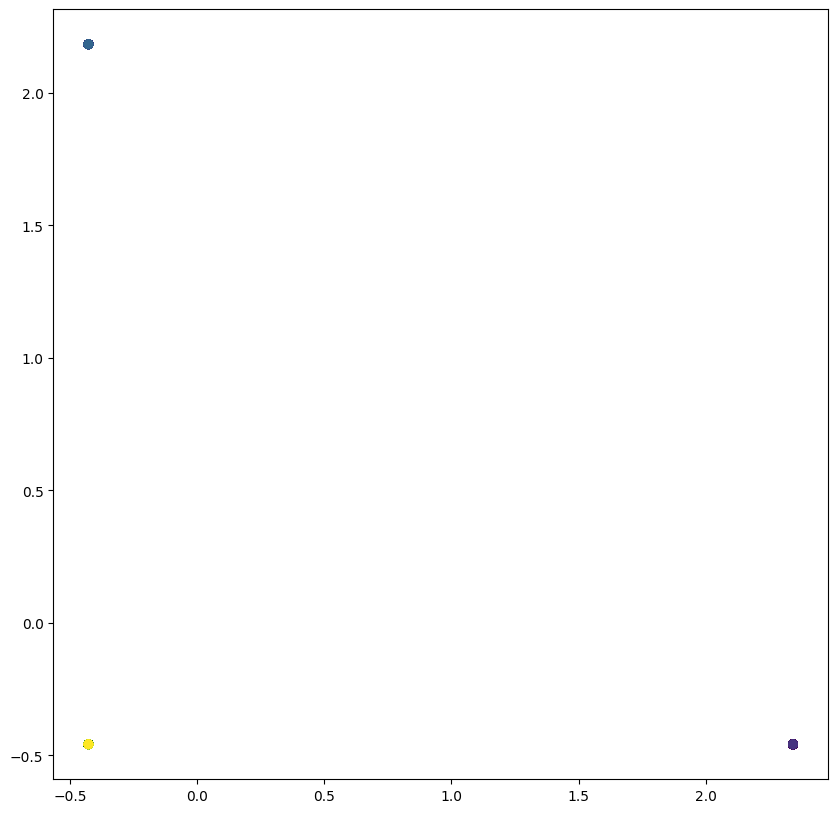

In [56]:
plt.figure(figsize=(10, 10))
plt.scatter(scaled_train_df[:, 0], scaled_train_df[:, 1], c=dbscan.labels_)
plt.show()

In [57]:
train_df['cluster'] = dbscan.labels_

In [58]:
train_df['cluster'].nunique()

88

In [59]:
test_df['cluster'] = dbscan.fit_predict(scaler.transform(test_df[cluster_cols]))

In [60]:
train_df['cluster'].value_counts()

cluster
0     2557
57    2557
65    2557
64    2557
63    2557
      ... 
46    2494
9     2177
53    1911
4     1249
48    1199
Name: count, Length: 88, dtype: int64

In [61]:
test_df['cluster'].value_counts()

cluster
0     1095
67    1095
65    1095
64    1095
63    1095
      ... 
28    1095
27    1095
26    1095
25    1095
89    1095
Name: count, Length: 90, dtype: int64

In [62]:
train_df['mean_num_sold_by_cluster'] = train_df.groupby('cluster')['num_sold'].transform('mean')
train_df['median_num_sold_by_cluster'] = train_df.groupby('cluster')['num_sold'].transform('median')
train_df['std_num_sold_by_cluster'] = train_df.groupby('cluster')['num_sold'].transform('std')
train_df['min_num_sold_by_cluster'] = train_df.groupby('cluster')['num_sold'].transform('min')
train_df['max_num_sold_by_cluster'] = train_df.groupby('cluster')['num_sold'].transform('max')

In [63]:
for i, group in test_df.groupby('cluster'):
    test_df.loc[group.index, 'mean_num_sold_by_cluster'] = train_df.loc[train_df['cluster'] == i, 'num_sold'].mean()
    test_df.loc[group.index, 'median_num_sold_by_cluster'] = train_df.loc[train_df['cluster'] == i, 'num_sold'].median()
    test_df.loc[group.index, 'std_num_sold_by_cluster'] = train_df.loc[train_df['cluster'] == i, 'num_sold'].std()
    test_df.loc[group.index, 'max_num_sold_by_cluster'] = train_df.loc[train_df['cluster'] == i, 'num_sold'].max()
    test_df.loc[group.index, 'min_num_sold_by_cluster'] = train_df.loc[train_df['cluster'] == i, 'num_sold'].min()

In [64]:
train_df.drop(columns=['date', 'country', 'product', 'store'], inplace=True)

In [65]:
test_df.drop(columns=['date', 'country', 'product', 'store'], inplace=True)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
int(0.8 * len(train_df))

177007

In [68]:
len(train_df)

221259

In [69]:
train = train_df.iloc[: int(0.8 * len(train_df))].copy()
val = train_df.iloc[int(0.8 * len(train_df)): ].copy()
X_train, y_train = train.drop(columns=['num_sold']), train['num_sold']
X_val, y_val = val.drop(columns=['num_sold']), val['num_sold']

In [70]:
train.shape, val.shape

((177007, 51), (44252, 51))

In [71]:
import xgboost as xgb

In [72]:
import seaborn as sns

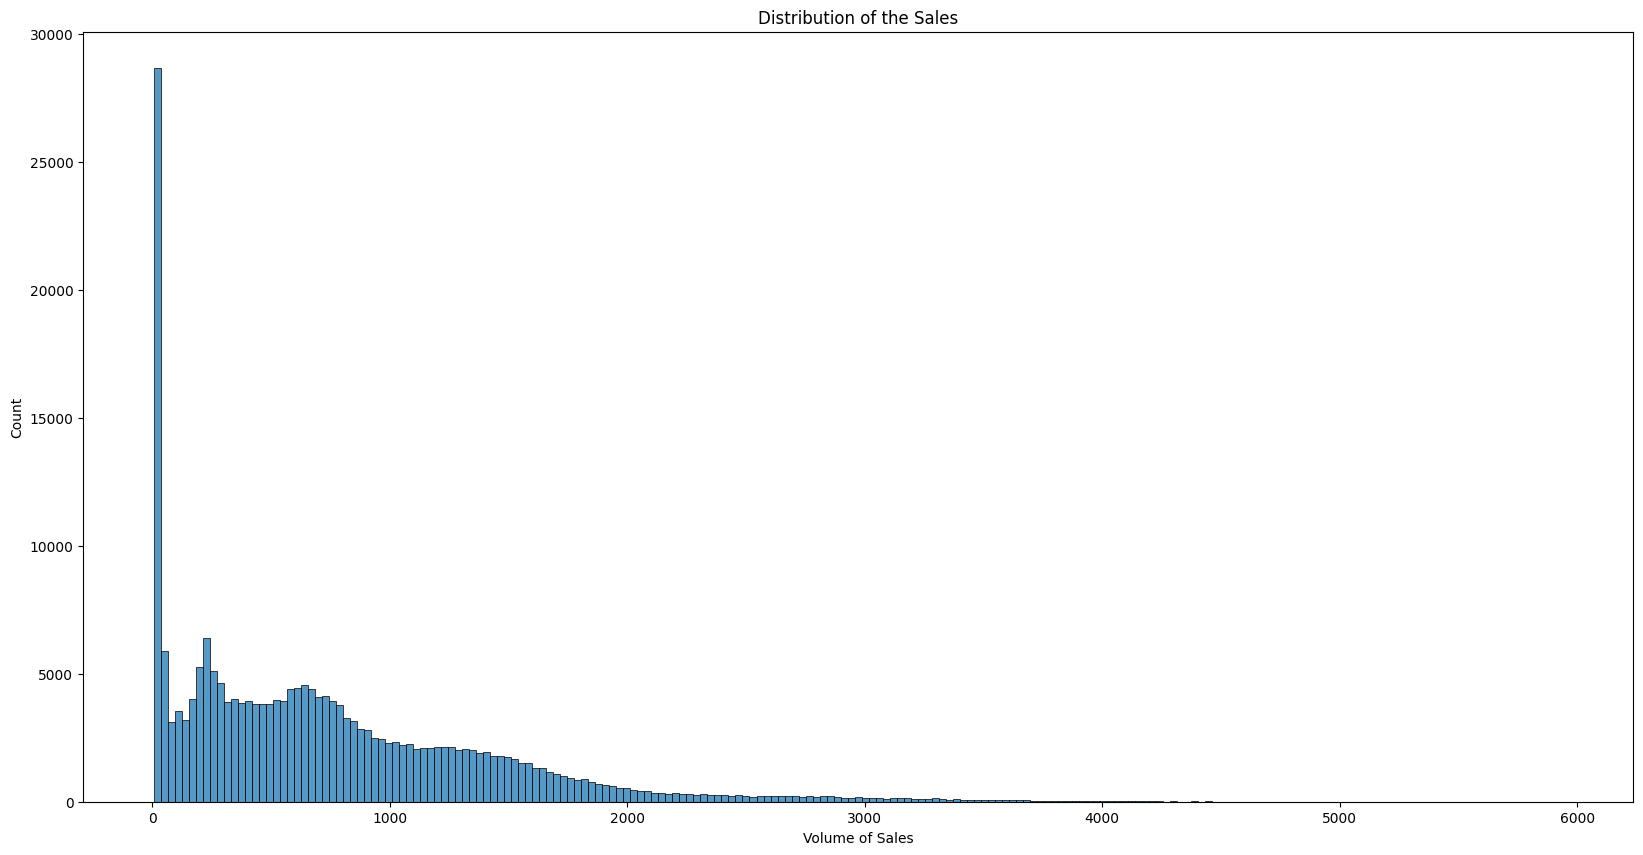

In [73]:
plt.figure(figsize=(20, 10))
sns.histplot(train_df['num_sold'])
plt.xlabel("Volume of Sales")
plt.ylabel("Count")
plt.title("Distribution of the Sales")
plt.show()

In [121]:
# xgb params
params = {
    'objective': 'reg:squarederror',
    "max_depth": 10,
    "eta": 0.05,
    "colsample_bytree": 0.8,
    "subsample": 0.8,
    "alpha": 0.1,
    "lambda": 0.1,
    "eval_metric": ["rmse", 'mape', 'mae']  # Optional, can use other metrics for evaluation.
}

In [122]:
import numpy as np

In [151]:
dtrain = xgb.DMatrix(data=X_train.values, label=np.log1p(y_train.values))
dval = xgb.DMatrix(data=X_val.values, label=np.log1p(y_val.values))

In [152]:
dtrain_full = xgb.DMatrix(data=train_df.drop(columns=['num_sold']).values, label=np.log1p(train_df['num_sold'].values))

In [153]:
new_test_df = test_df.drop(columns=['id', 'num_sold']).values

In [154]:
dtest_full = xgb.DMatrix(data=new_test_df)

In [155]:
xgb_model = xgb.train(
        params,
        dtrain,
        num_boost_round=1000,
        evals=[(dtrain, "Train"),(dval, "Val")],
        early_stopping_rounds=50,
        verbose_eval=10
    )

[0]	Train-rmse:1.45140	Train-mape:0.27132	Train-mae:1.12820	Val-rmse:1.39762	Val-mape:0.26109	Val-mae:1.07588
[10]	Train-rmse:0.87318	Train-mape:0.16298	Train-mae:0.67816	Val-rmse:0.82700	Val-mape:0.15473	Val-mae:0.64001
[20]	Train-rmse:0.52852	Train-mape:0.09835	Train-mae:0.41028	Val-rmse:0.49008	Val-mape:0.09175	Val-mae:0.38225
[30]	Train-rmse:0.32435	Train-mape:0.06003	Train-mae:0.25233	Val-rmse:0.29353	Val-mape:0.05467	Val-mae:0.23218
[40]	Train-rmse:0.20462	Train-mape:0.03745	Train-mae:0.16011	Val-rmse:0.18368	Val-mape:0.03331	Val-mae:0.14756
[50]	Train-rmse:0.13624	Train-mape:0.02435	Train-mae:0.10763	Val-rmse:0.12956	Val-mape:0.02192	Val-mae:0.10411
[60]	Train-rmse:0.09892	Train-mape:0.01687	Train-mae:0.07842	Val-rmse:0.10478	Val-mape:0.01623	Val-mae:0.08321
[70]	Train-rmse:0.07868	Train-mape:0.01267	Train-mae:0.06221	Val-rmse:0.09508	Val-mape:0.01400	Val-mae:0.07481
[80]	Train-rmse:0.06834	Train-mape:0.01052	Train-mae:0.05391	Val-rmse:0.09117	Val-mape:0.01331	Val-mae:0.07161
[9

In [156]:
xgb_model_full = xgb.train(
    params,
    dtrain_full,
    num_boost_round=200,
    evals=[(dtrain_full, "Train")],
)

[0]	Train-rmse:1.44177	Train-mape:0.26943	Train-mae:1.12304
[1]	Train-rmse:1.37014	Train-mape:0.25603	Train-mae:1.06725
[2]	Train-rmse:1.30229	Train-mape:0.24331	Train-mae:1.01427
[3]	Train-rmse:1.23766	Train-mape:0.23122	Train-mae:0.96395
[4]	Train-rmse:1.17628	Train-mape:0.21974	Train-mae:0.91616
[5]	Train-rmse:1.11800	Train-mape:0.20883	Train-mae:0.87078
[6]	Train-rmse:1.06264	Train-mape:0.19847	Train-mae:0.82767
[7]	Train-rmse:1.01008	Train-mape:0.18864	Train-mae:0.78675
[8]	Train-rmse:0.96015	Train-mape:0.17929	Train-mae:0.74788
[9]	Train-rmse:0.91275	Train-mape:0.17042	Train-mae:0.71098
[10]	Train-rmse:0.86773	Train-mape:0.16199	Train-mae:0.67593
[11]	Train-rmse:0.82499	Train-mape:0.15399	Train-mae:0.64264
[12]	Train-rmse:0.78440	Train-mape:0.14638	Train-mae:0.61100
[13]	Train-rmse:0.74586	Train-mape:0.13916	Train-mae:0.58100
[14]	Train-rmse:0.70935	Train-mape:0.13231	Train-mae:0.55248
[15]	Train-rmse:0.67462	Train-mape:0.12580	Train-mae:0.52546
[16]	Train-rmse:0.64163	Train-mape

In [157]:
train_pred = np.expm1(xgb_model.predict(dtrain))
val_pred = np.expm1(xgb_model.predict(dval))

In [158]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error

In [159]:
mean_absolute_error(y_pred=train_pred, y_true=y_train)

31.039255682306965

In [160]:
mean_absolute_error(y_pred=val_pred, y_true=y_val)

48.37281612733341

In [161]:
median_absolute_error(y_pred=train_pred, y_true=y_train)

15.434967041015625

In [162]:
median_absolute_error(y_pred=val_pred, y_true=y_val)

22.342239379882812

In [163]:
dtest_full.num_row(), dtest_full.num_col()

(98550, 50)

In [164]:
dtrain_full.num_row(), dtrain_full.num_col()

(221259, 50)

In [165]:
test_pred = xgb_model.predict(dtest_full)

In [166]:
test_pred

array([6.7827315, 6.4386034, 6.0766964, ..., 7.04448  , 7.992071 ,
       7.9975495], dtype=float32)

In [167]:
test_df['num_sold'] = np.expm1(test_pred)

In [168]:
test_df['num_sold'] = np.round(test_df['num_sold'])

In [169]:
min(test_df['num_sold']), max(test_df['num_sold'])

(5.0, 3744.0)

In [170]:
train_df['num_sold'].min(), train_df['num_sold'].max()

(5.0, 5939.0)

In [171]:
submission_data = test_df[['id', 'num_sold']]

In [172]:
submission_data.to_csv("/Users/priyanshu.tuli/Desktop/machinehack/sticker_sale_forecast/playground-series-s5e1/submission.csv", index=False)

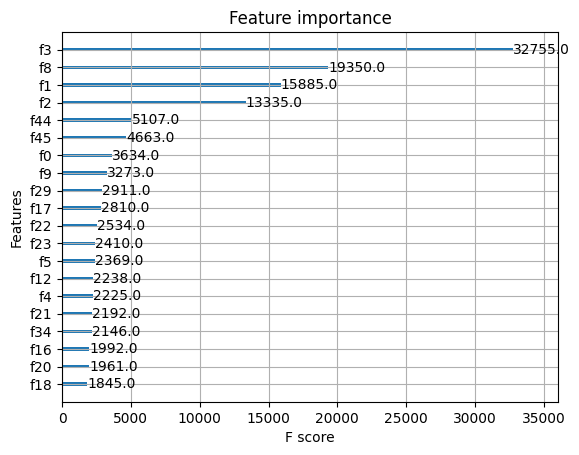

In [173]:
xgb.plot_importance(xgb_model, max_num_features=20)
plt.show()